In [1]:
from pymatgen.io.lammps.outputs import parse_lammps_log
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
%pwd

'/mnt/d/home/qd-crosslink'

In [5]:
vis_path = "/mnt/d/home/vis/md_freeze/"

In [6]:
thermo = parse_lammps_log(vis_path + "simplified_mc.log")

In [7]:
len(thermo)

5

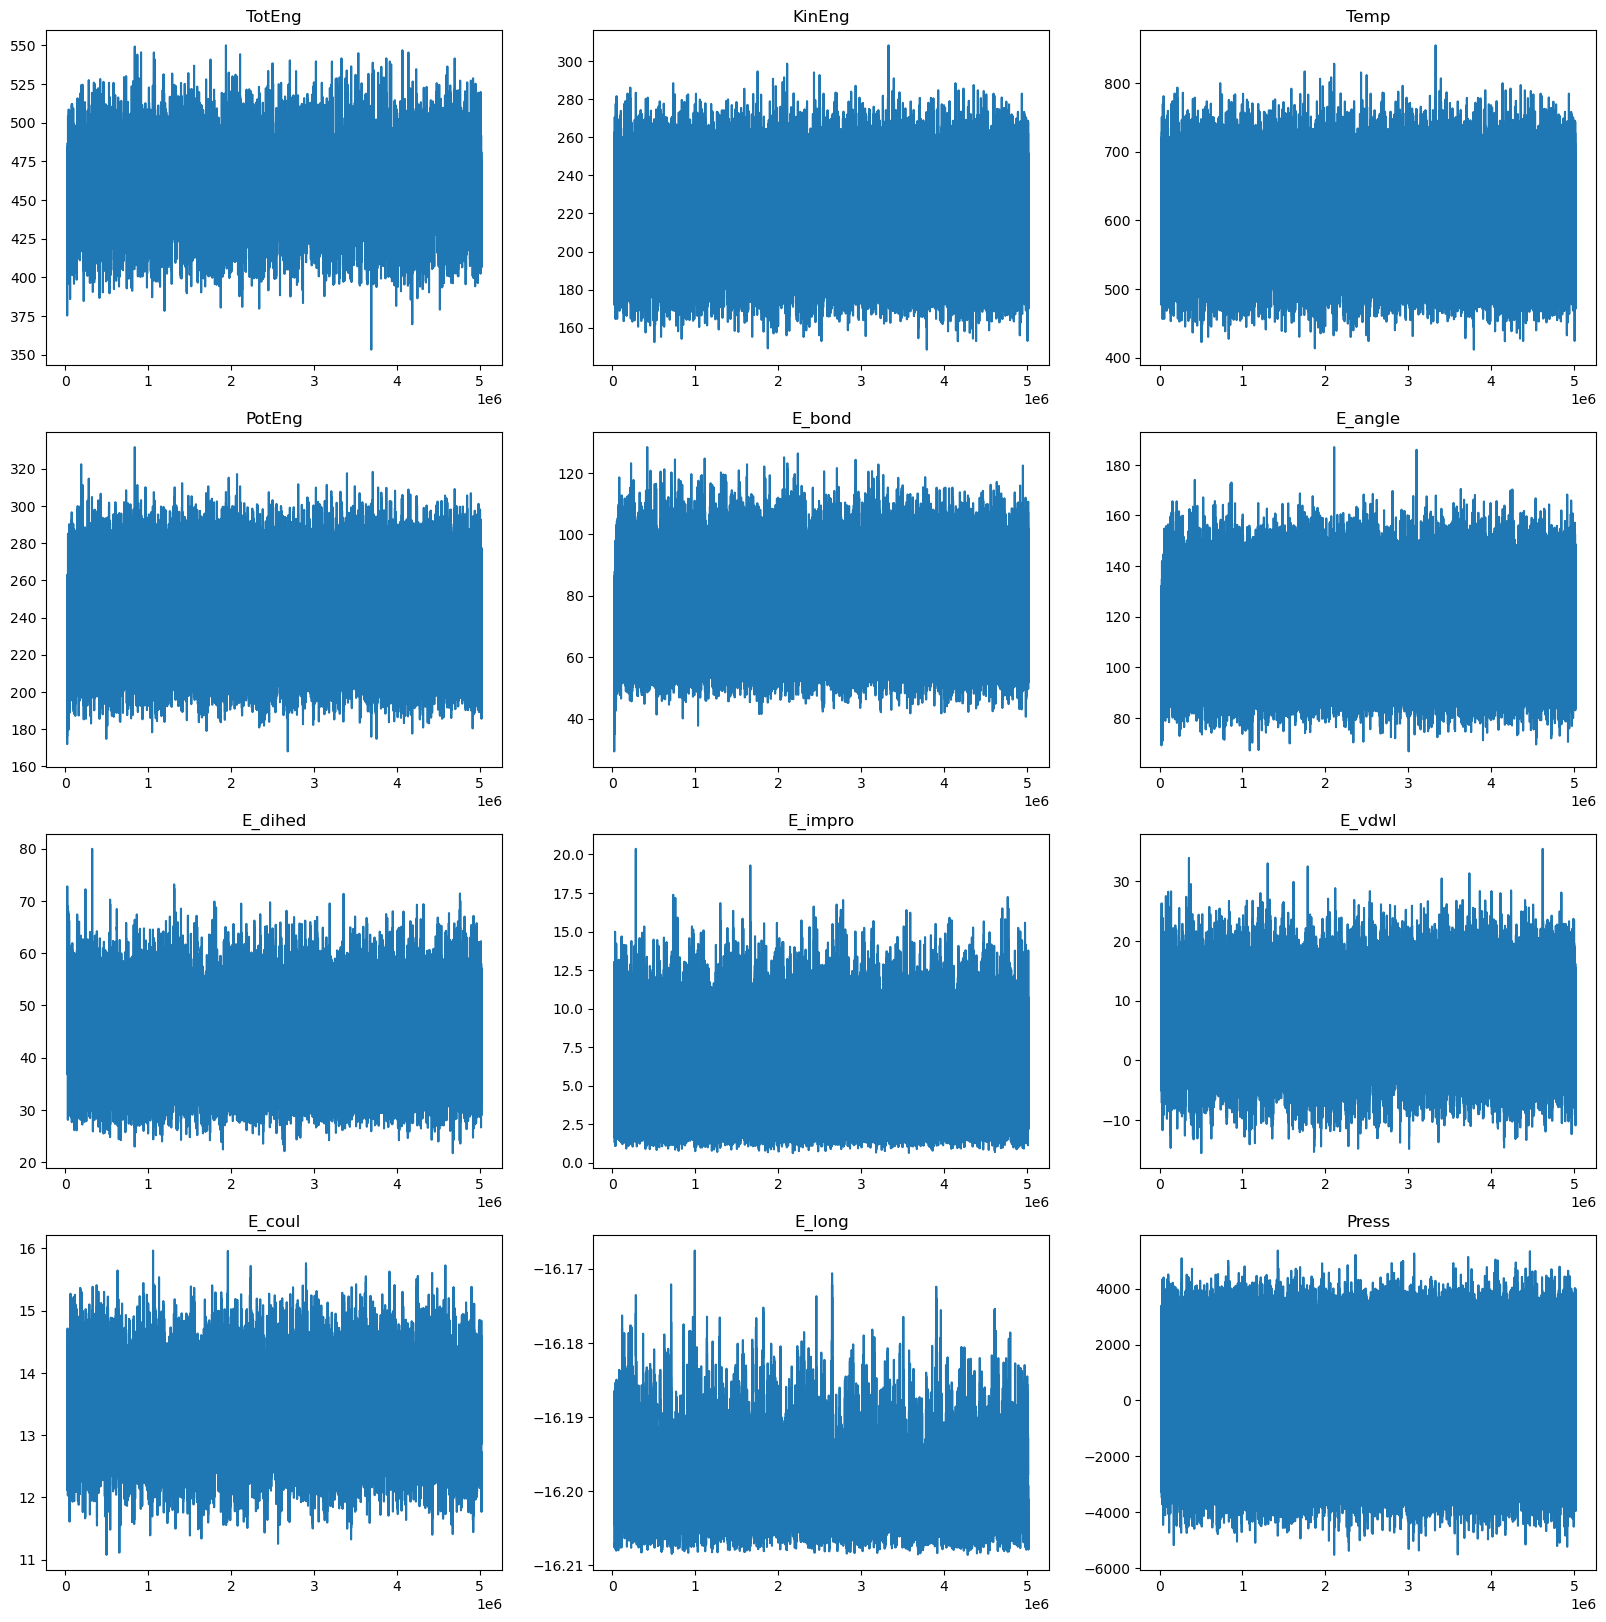

In [8]:
fig, axs = plt.subplots(4,3, figsize=(20,20))
dat = thermo[4].columns[1:]
x = thermo[4]['Step']

for prop,ax in zip(dat, axs.ravel()):
    ax.set_title(prop)
    ax.plot(x,thermo[4][prop])
    # ax.plot(x,expanded_cell_thermo[4][prop], color='black')
    
plt.show()

In [9]:
import MDAnalysis as mda
# from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory
import numpy.linalg

In [10]:
%pwd

'/mnt/d/home/qd-crosslink'

In [27]:
system = mda.Universe("/mnt/d/home/qd-crosslink/monte-carlo-test/struct_file/oleic_xlig.mol2", vis_path + "simplified_mc.fine_steps.lammpsdump")

In [28]:
xlig = system.atoms[0:68]
oleic = system.atoms[68:]

In [29]:
%%time
oleic_analysis = {
    "COM": [],
    "COG": []
}

xlig_analysis = {
    "COM": [],
    "COG": []
}

for ts in system.trajectory:
    xlig.wrap()
    oleic.wrap()
    oleic_analysis['COM'].append(oleic.center_of_mass())
    oleic_analysis['COG'].append(oleic.center_of_geometry())
    xlig_analysis['COM'].append(xlig.center_of_mass())
    xlig_analysis['COG'].append(xlig.center_of_geometry())

CPU times: user 3min 7s, sys: 2.4 s, total: 3min 10s
Wall time: 3min 50s


In [30]:
fiver = xlig[0:4]
fiver = fiver.concatenate(xlig[30])

In [31]:
for atom in fiver:
    print(atom)

<Atom 1: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 2: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 3: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 4: N of type N.pl3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 31: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>


In [32]:
fiver_com = []

for ts in system.trajectory:
    fiver.wrap()
    fiver_com.append(fiver.center_of_mass())

In [33]:
fiver_mass_distance = [np.linalg.norm(fiver_com[i] - oleic_analysis['COM'][i]) for i in range(len(system.trajectory))]

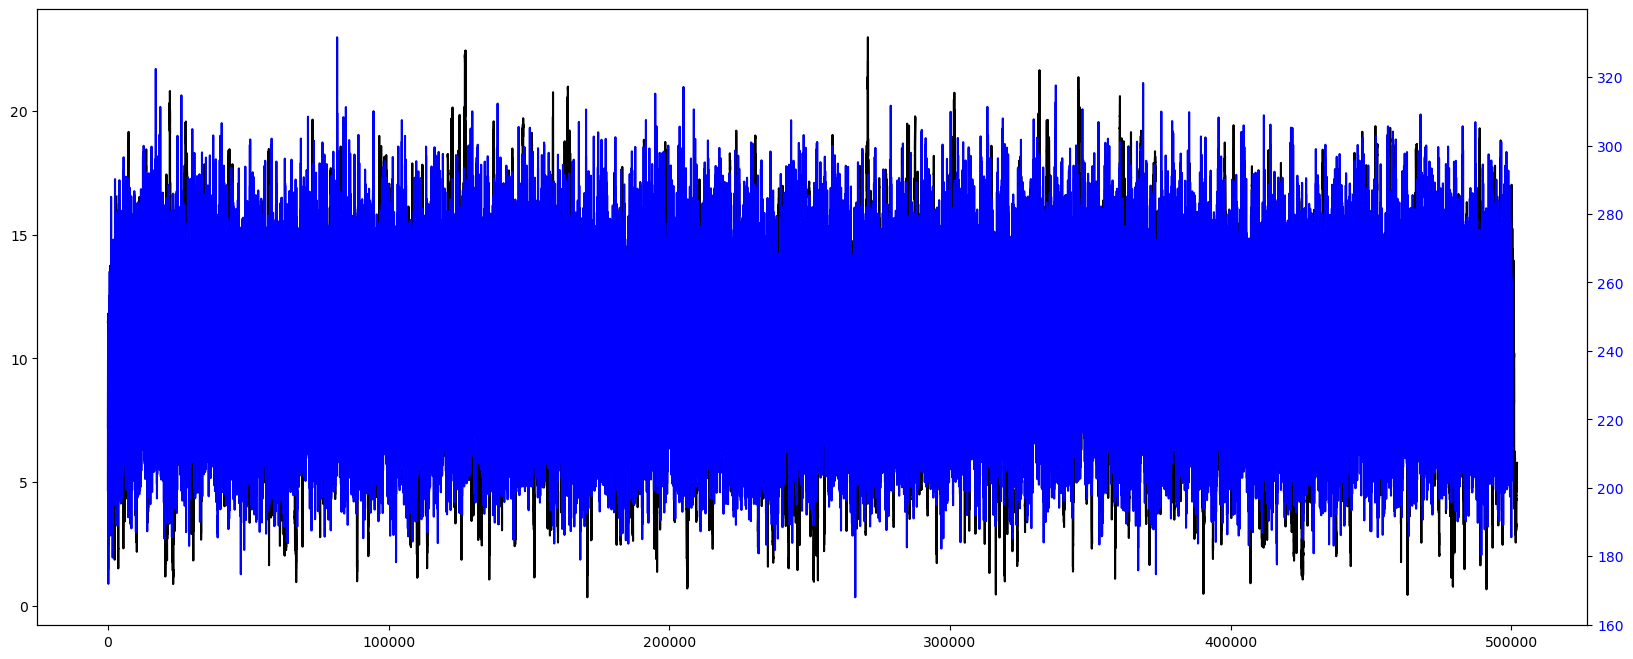

In [35]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(fiver_mass_distance, color='black')
ax.tick_params(axis='y', labelcolor='black')

ax2 = ax.twinx()

ax2.plot(thermo[4]['PotEng'], color='blue')
ax2.tick_params(axis='y', labelcolor="blue")

plt.show()

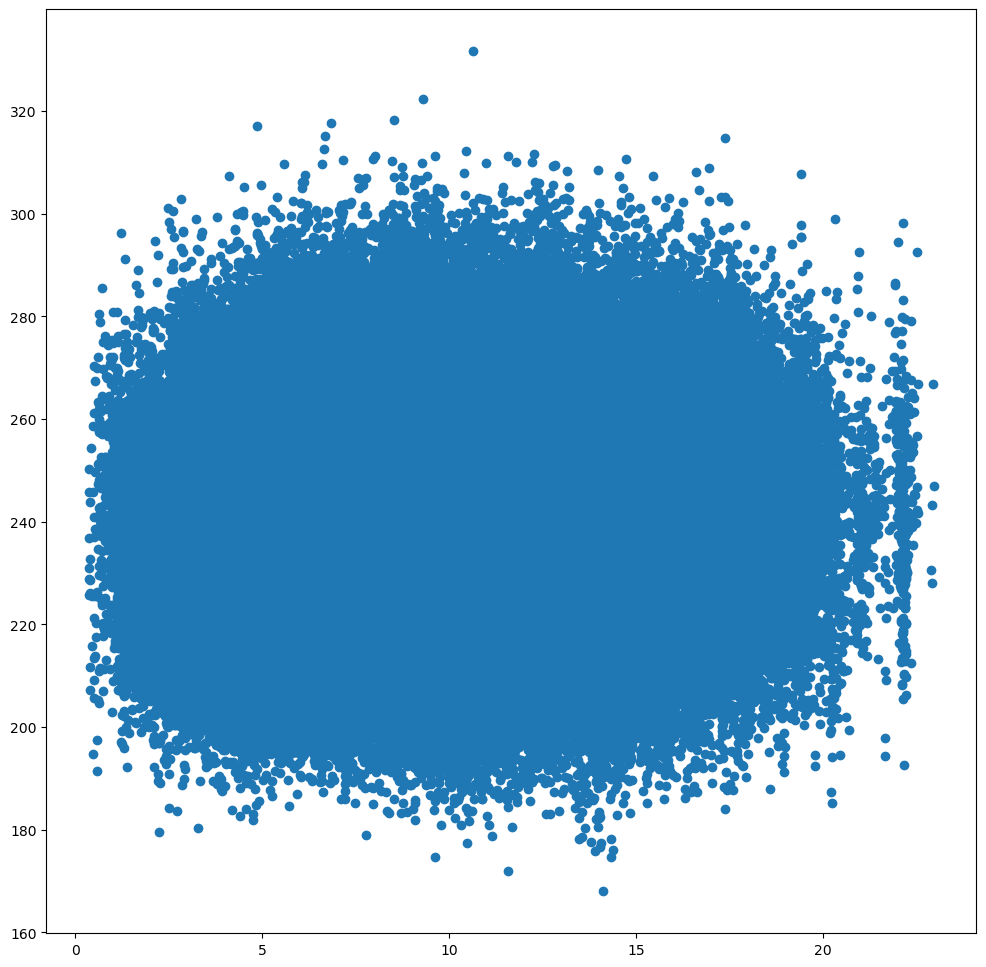

In [43]:
plt.figure(figsize=(12,12))
plt.scatter(fiver_mass_distance[2000:], thermo[4]['PotEng'][2:])
plt.show()

In [42]:
len(thermo[4]['PotEng'][2:])

500000

In [39]:
len(fiver_mass_distance[2000:])

500000